# 2

Solution with N=10 interior points (h=0.0909):
------------------------------------------------------------
         x       Numerical Exact (Analytically)           Error
------------------------------------------------------------
  1   0.090909     0.834354009989     0.766403168816    6.795084e-02
  2   0.181818     2.210854379067     2.018497097582    1.923573e-01
  3   0.272727     2.732714565420     2.504947519069    2.277670e-01
  4   0.363636     2.002367667450     1.869587565546    1.327801e-01
  5   0.454545     1.086289707772     1.067837376260    1.845233e-02
  6   0.545455     1.268107889591     1.249655558078    1.845233e-02
  7   0.636364     2.547822212905     2.415042111001    1.327801e-01
  8   0.727273     3.641805474511     3.414038428160    2.277670e-01
  9   0.818182     3.483581651794     3.291224370309    1.923573e-01
 10   0.909091     2.470717646353     2.402766805180    6.795084e-02

Maximum error compared to N=10000 reference: 2.277670e-01


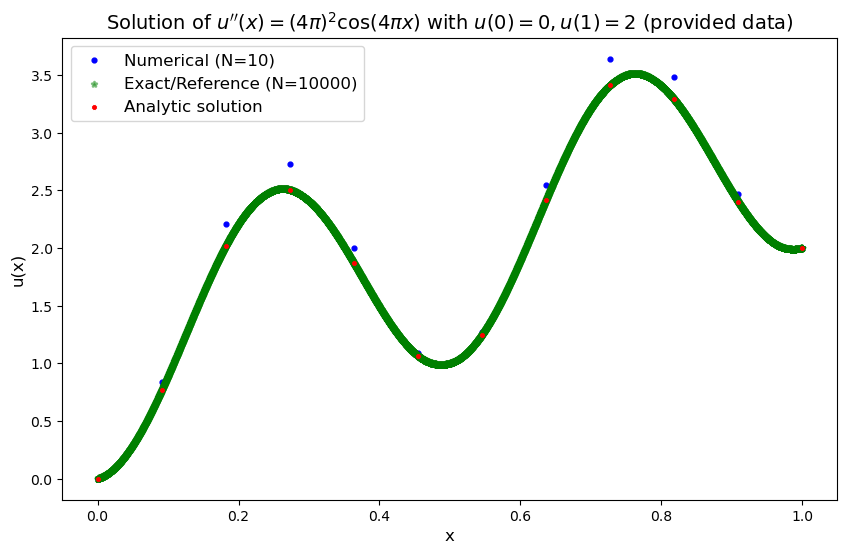

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def solve_bvp(N=10):
    L = 1.0
    h = L / (N + 1)
    x = np.linspace(0, 1, N + 2)

    f = lambda x: (4*np.pi)**2 * np.cos(4*np.pi*x)

    u = np.zeros(N + 2)
    u[0]  = 0
    u[-1] = 2

    A = np.zeros((N, N))
    b = np.zeros(N)

    for i in range(N):
        A[i, i] = -2.0
        if i > 0:
            A[i, i-1] = 1.0
        if i < N-1:
            A[i, i+1] = 1.0

        b[i] = h**2 * f(x[i+1])

    # Inject boundary conditions
    b[0]  -= u[0]
    b[-1] -= u[-1]

    u[1:-1] = np.linalg.solve(A, b)
    return x, u


def exact_solution(x):
    """
    Exact solution to u''(x) = (4π)² cos(4πx) with u(0)=0, u(1)=2
    
    The general solution is: u(x) = -cos(4πx) + Ax + B
    Applying boundary conditions:
    u(0) = -1 + B = 0 → B = 1
    u(1) = -cos(4π) + A + 1 = -1 + A + 1 = A = 2 → A = 2
    
    So exact solution: u(x) = -cos(4πx) + 2x + 1
    """
    return -np.cos(4*np.pi*x) + 2*x + 1

def main(N=10, analytic=True, print_results=True, plot=True):
    # Solve with N=10

    # N = 10
    x, u_numerical = solve_bvp(N)
    
    # Calculate exact solution
    u_exact = exact_solution(x)
    
    # Print results
    if print_results:
        print(f"Solution with N={N} interior points (h={1/(N+1):.4f}):")
        print("-" * 60)
        print(f"{'x':>10} {'Numerical':>15} {'Exact (Analytically)':>15} {'Error':>15}")
        print("-" * 60)
        for i in range(1, N+1):  # i from 1 to 10
            error = abs(u_numerical[i] - u_exact[i])
            print(f"{i:3d} {x[i]:10.6f} {u_numerical[i]:18.12f} {u_exact[i]:18.12f} {error:15.6e}")
        print("=" * 60)
    

    try:
        # Load reference solution (N=10000)
        ref_data = np.loadtxt('solutionA_N10000.dat')
        if ref_data is not None:
            x_ref = ref_data[:, 0]
            u_ref = ref_data[:, 1]
            
            # Interpolate reference solution to our grid
            from scipy.interpolate import interp1d
            interp_func = interp1d(x_ref, u_ref, kind='linear')
            u_ref_interp = interp_func(x)
            
            # Calculate error compared to reference
            error_ref = np.max(np.abs(u_numerical - u_ref_interp))
            print(f"\nMaximum error compared to N=10000 reference: {error_ref:.6e}")
                # Plot results
            if plot:
                plt.figure(figsize=(10, 6))
                assert x.shape == u_numerical.shape, "x and u_numerical must have the same shape"
                plt.scatter(x, u_numerical, marker='o', color='b', s=12, label=f'Numerical (N={N})')

                plt.scatter(x_ref, u_ref, marker='*', color='g', s=12, alpha = .5, label='Exact/Reference (N=10000)', linewidth=2)
                if analytic:
                    plt.scatter(x, u_exact, marker='x', color='r', s=6, label='Analytic solution', linewidth=2)
                    
                plt.xlabel('x', fontsize=12)
                plt.ylabel('u(x)', fontsize=12)
                plt.title('Solution of $u\'\'(x) = (4\\pi)^2 \\cos(4\\pi x)$ with $u(0)=0, u(1)=2$ (provided data)', fontsize=14)
                plt.legend(fontsize=12)

    except:
        print("\nNote: Reference file 'solutionA_N10000.dat' not found for comparison.")
        print("Using exact solution for validation instead.")

        for i in range(len(x)):
            error = abs(u_numerical[i] - u_exact[i])
            print(f"{x[i]:10.4f} {u_numerical[i]:15.6f} {u_exact[i]:15.6f} {error:15.6f}")
        
        # Calculate and print maximum error
        max_error = np.max(np.abs(u_numerical - u_exact))
        print("\n" + "=" * 60)
        print(f"Maximum error: {max_error:.6e}")
        print("=" * 60)
        
        # Plot results
        plt.figure(figsize=(10, 6))
        plt.scatter(x, u_numerical, 'bo-', label=f'Numerical (N={N})', markersize=6)
        plt.plot(x, u_exact, 'r-', label='Exact Analytic Solution', linewidth=2)
        plt.xlabel('x', fontsize=12)
        plt.ylabel('u(x)', fontsize=12)
        plt.title('Solution of $u\'\'(x) = (4\\pi)^2 \\cos(4\\pi x)$ with $u(0)=0, u(1)=2$ (analytical solution)', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    return x, u_numerical, u_ref, u_exact
        

if __name__ == "__main__":
    main(N=10)

# 3

For confirmation that the numerical approximation converges to the true solution/the provided data, we can refine the mesh then compute the errors:


Maximum error compared to N=10000 reference: 2.615429e-05


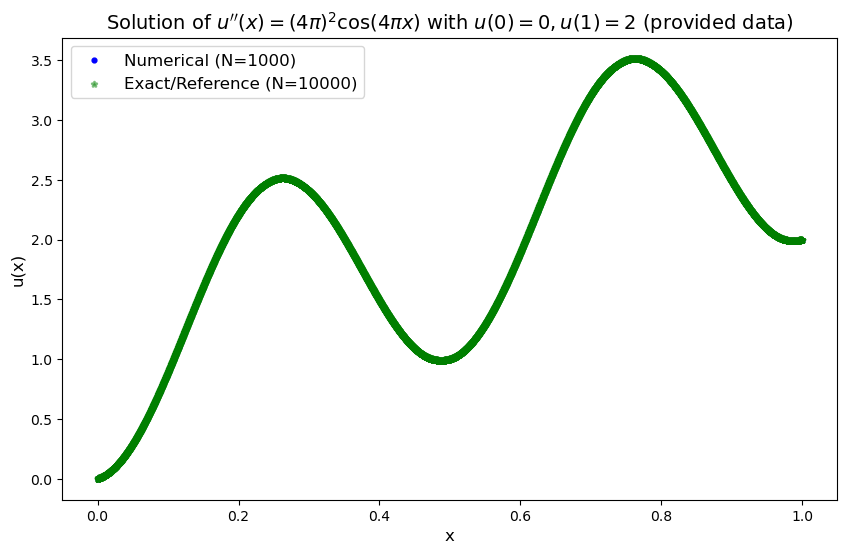

In [ ]:
x, u_numerical, u_ref, u_exact = main(1000, analytic=False, print_results=False)

     N            h      E (Frobenius)         e (scaled)

Maximum error compared to N=10000 reference: 6.932453e-01
     5 1.666667e-01      1.386490e+00       2.772981e-01

Maximum error compared to N=10000 reference: 2.277670e-01
    10 9.090909e-02      4.721594e-01       4.721594e-02

Maximum error compared to N=10000 reference: 6.042456e-02
    20 4.761905e-02      1.705179e-01       8.525896e-03

Maximum error compared to N=10000 reference: 1.570735e-02
    40 2.439024e-02      6.167992e-02       1.541998e-03

Maximum error compared to N=10000 reference: 4.014668e-03
    80 1.234568e-02      2.213354e-02       2.766693e-04

Maximum error compared to N=10000 reference: 1.015461e-03
   160 6.211180e-03      7.889783e-03       4.931114e-05

Maximum error compared to N=10000 reference: 2.553685e-04
   320 3.115265e-03      2.799704e-03       8.749076e-06

Maximum error compared to N=10000 reference: 6.397205e-05
   640 1.560062e-03      9.890482e-04       1.545388e-06

Maximum error

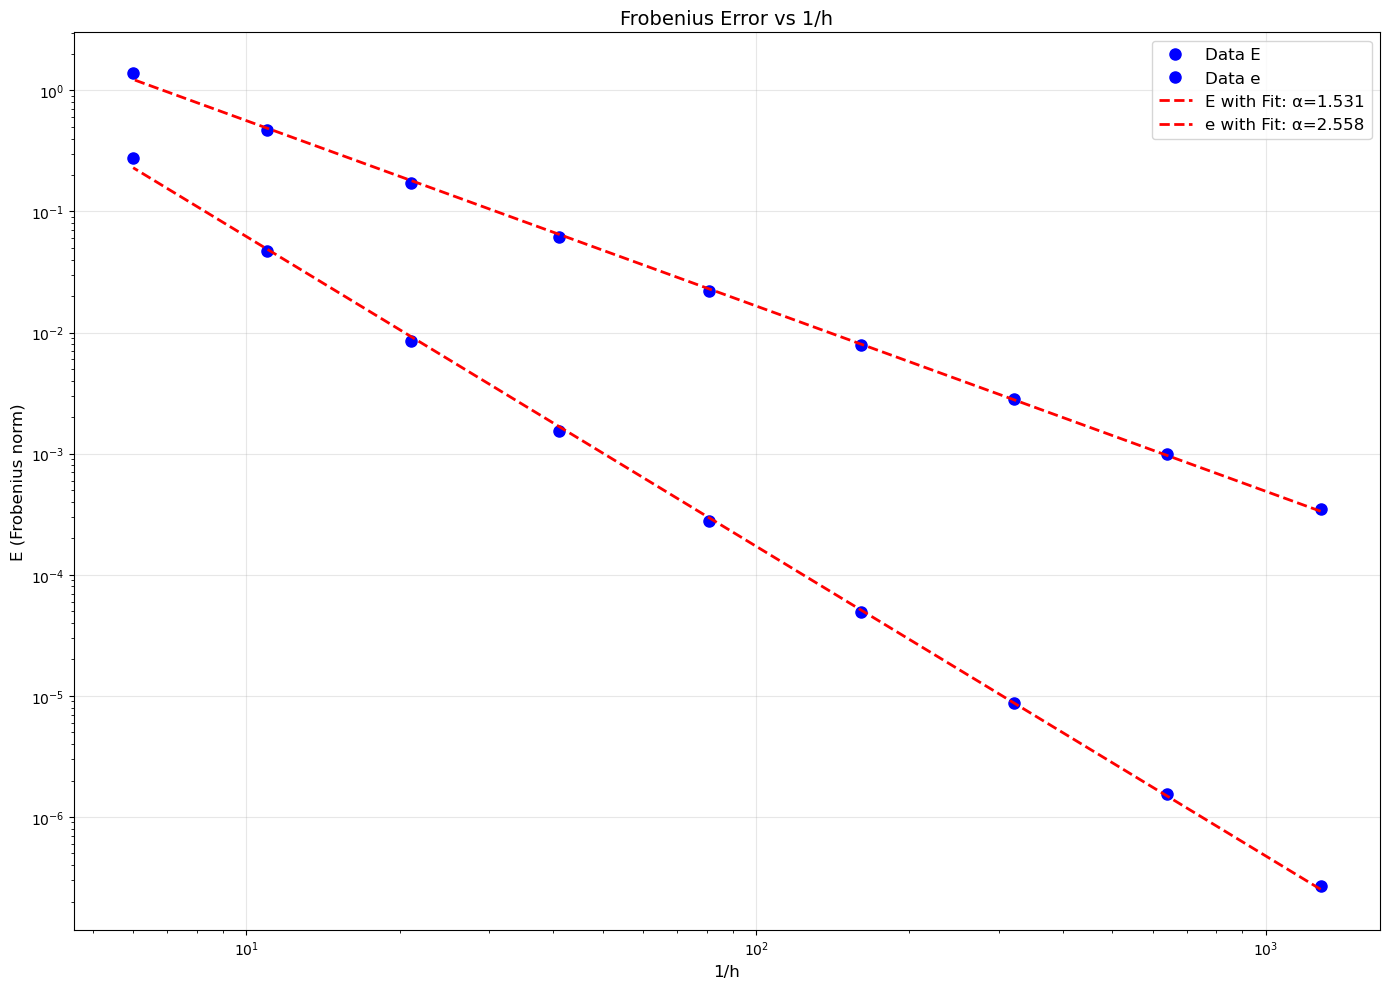


CONVERGENCE RATE ANALYSIS:
Theoretical expectation: 2nd-order scheme → α ≈ 2
Frobenius norm (E): α = 1.5306 (expectation: 2.0)
Scaled norm (e):    α = 2.5578 (expectation: 2.0)


In [3]:
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit
import warnings; warnings.filterwarnings('ignore')


L = 1.
E = lambda u_num, u_ref: np.linalg.norm(u_num - u_ref)
e = lambda u_num, u_ref: np.linalg.norm(u_num - u_ref) / len(u_num)
N_values = [5, 10, 20, 40, 80, 160, 320, 640, 1280]
results = {
    'N': [],
    'h': [],
    'E': [],
    'e': [],
}
    
print(f"{'N':>6} {'h':>12} {'E (Frobenius)':>18} {'e (scaled)':>18}")

for N in N_values:
    x, u_numerical, u_ref, u_exact = main(N, analytic=False, print_results=False, plot=False)
    x_ref = np.linspace(0, 1, 10000 + 2)
    uinterior_ref = CubicSpline( x_ref, u_ref)(x[1:-1])

    Error, error, = E(u_numerical[1:-1], uinterior_ref), e(u_numerical[1:-1], uinterior_ref)
    h = L / (N + 1)

    results['N'].append(N)
    results['h'].append(h)
    results['E'].append(Error)
    results['e'].append(error)
    print(f"{N:6d} {h:12.6e}"
            f"{Error:18.6e} {error:18.6e}")

print("=" * 80)

for key in results:
    results[key] = np.array(results[key])

log_h = np.log(results['h'])
log_E = np.log(results['E'])
log_e = np.log(results['e'])



# For E (Frobenius norm)
coeffs_E = np.polyfit(log_h, log_E, 1)
α_E = coeffs_E[0]
C_E = np.exp(coeffs_E[1])

# For e (scaled Frobenius norm)
coeffs_e = np.polyfit(log_h, log_e, 1)
α_e = coeffs_e[0]
C_e = np.exp(coeffs_e[1])

print(f"E (Frobenius) fit: E = {C_E:.6f} * h^{α_E:.4f}")
print(f"e (scaled) fit:    e = {C_e:.6f} * h^{α_e:.4f}")


# Create log-log plot
fig, ax = plt.subplots(figsize=(14, 10))

ax.loglog(1/results['h'], results['E'], 'bo', linewidth=2, markersize=8, label='Data E')
ax.loglog(1/results['h'], results['e'], 'bo', linewidth=2, markersize=8, label='Data e')

# Plot fitted curve
h_fit = np.logspace(np.log10(min(results['h'])), np.log10(max(results['h'])), 100)
E_fit = C_E * (h_fit**α_E)
ax.loglog(1/h_fit, E_fit, 'r--', linewidth=2, label=f'E with Fit: α={α_E:.3f}')

e_fit = C_e * (h_fit**α_e)
ax.loglog(1/h_fit, e_fit, 'r--', linewidth=2, label=f'e with Fit: α={α_e:.3f}')

ax.set_xlabel('1/h', fontsize=12)
ax.set_ylabel('E (Frobenius norm)', fontsize=12)
ax.set_title('Frobenius Error vs 1/h', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)


plt.tight_layout()
plt.savefig('error_convergence.png', dpi=150, bbox_inches='tight')
plt.show()

# Print convergence rates
print("\n" + "=" * 80)
print("CONVERGENCE RATE ANALYSIS:")
print("=" * 80)
print(f"Theoretical expectation: 2nd-order scheme → α ≈ 2")
print(f"Frobenius norm (E): α = {α_E:.4f} (expectation: 2.0)")
print(f"Scaled norm (e):    α = {α_e:.4f} (expectation: 2.0)")


Approximately, E converges at order 1.5 and e converges at order 2.5.
Theoretically, E should converge at 1.5, while e is expected to be of order 1 greater than the order of E: e is proportional to 1/(number of interior points on mesh) which is proportional to the step size h. 

For proof/explanation on expected vs theoretical orders of convergence:

Assume the pointwise discretization error satisfies
$$
u_h(x_i) - u(x_i) \rvert = O(h^2).
$$

Then the discrete $\ell^2$ error is
$$
E
= \left( \sum_{i=1}^{N} O(h^4) \right)^{1/2}
= O\!\left( \sqrt{N}\, h^2 \right)
= O(h^{3/2}),
$$
since
$$
N \sim \frac{1}{h}.
$$

Next, define the scaled error
$$
e = \frac{1}{N} \, \lVert u_h - u \rVert_{\ell^2}.
$$

Because
$$
\frac{1}{N} \sim h,
$$

we obtain
$$
e = h\,E.
$$

Therefore,
$$
e = O\!\left( h^{3/2 + 1} \right)
= O\!\left( h^{5/2} \right).
$$

Hence, the observed convergence rate of order $2.5$ for $e$ is as theoretically expeccted.